# 範例1

# 長式資料和寬式資料的轉換

資料來源：桃園國際機場
- https://www.taoyuanairport.com.tw/passengervolume

In [1]:
import requests
import pandas as pd
playload = {
    "type":["入境","出境"],
    "query":"new",
    "date":"2019-01-01",
    "endDate":"2023-12-01"}
url = r'https://www.taoyuan-airport.com/api/api/statistics/passenger/month'
jd = requests.post(url, data = playload).json()
df = pd.DataFrame(jd)
df = df.iloc[:, [0, 1, 3, 5]]
df.columns = ['年/月', '入境人數', '出境人數', '總計']
df['年/月'] = pd.to_datetime(df['年/月'], format = '%Y%m')
df['年'] = df['年/月'].apply(lambda x:x.year)
df['月'] = df['年/月'].apply(lambda x:x.month)
df = df.drop(['年/月'], axis = 1)
df

,入境人數,出境人數,總計,年,月
0,1943310,2057706,4001016,2019,1
1,1889970,1930695,3820665,2019,2
2,2099027,2056959,4155986,2019,3
3,2107752,2020234,4127986,2019,4
4,1981276,2056463,4037739,2019,5
5,1959778,2050180,4009958,2019,6
6,2119400,2072081,4191481,2019,7
7,2128036,2158163,4286199,2019,8
8,1850011,1798243,3648254,2019,9
9,2044258,2042653,4086911,2019,10


### pandas

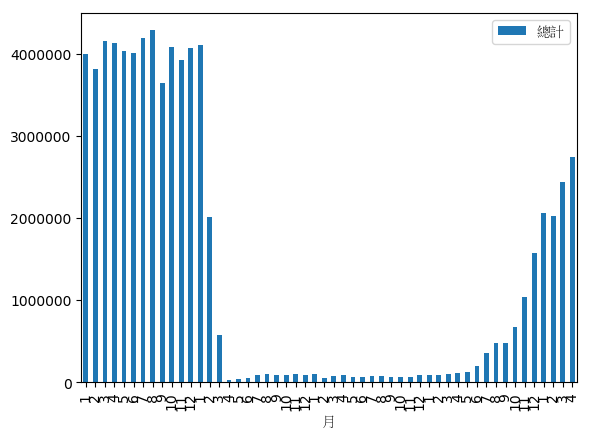

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font = fm.FontProperties(fname = r'C:\Windows\Fonts\mingliu.ttc')

df.plot(kind = 'bar', x='月', y='總計')
plt.legend(prop = font)
plt.xlabel('月', fontproperties = font)
plt.show()

## 長式資料轉為寬式資料

### 樞紐分析表
DataFrame.pivot_table(values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort=True)
- values：聚合的目標欄位
- index：聚合後的新索引
- columns：聚合後的新欄位
- aggfunc：聚合函式（function）

<B>問題</B> 對應 <B>pivot_table()</B>：
- 各年度（index）不同月份（columns）的總（sum）出入境人數（values）是多少？

DataFrame.pivot(index=None, columns=None, values=None)
- index：轉換後的新索引，[str ,object ,a list of str]
- columns：轉換後的新欄位，[str ,object ,a list of str]
- values：目標欄位，[str, object ,a list of the previous]

In [2]:
df_pivot = df.pivot_table(values='總計', index='年', columns='月', aggfunc='sum')
df_pivot

月,1,2,3,4,5,6,7,8,9,10,11,12
年,,,,,,,,,,,,
2019,4001016.0,3820665.0,4155986.0,4127986.0,4037739.0,4009958.0,4191481.0,4286199.0,3648254.0,4086911.0,3924528.0,4069567.0
2020,4107181.0,2009524.0,582425.0,34618.0,40049.0,52374.0,85955.0,102767.0,95544.0,90728.0,97320.0,87593.0
2021,96365.0,58067.0,78219.0,84978.0,70590.0,68304.0,73709.0,79340.0,71193.0,69137.0,68193.0,90888.0
2022,92128.0,95251.0,101740.0,113918.0,131697.0,199401.0,355160.0,479706.0,477191.0,670254.0,1034847.0,1573207.0
2023,2063975.0,2024072.0,2439420.0,2738520.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


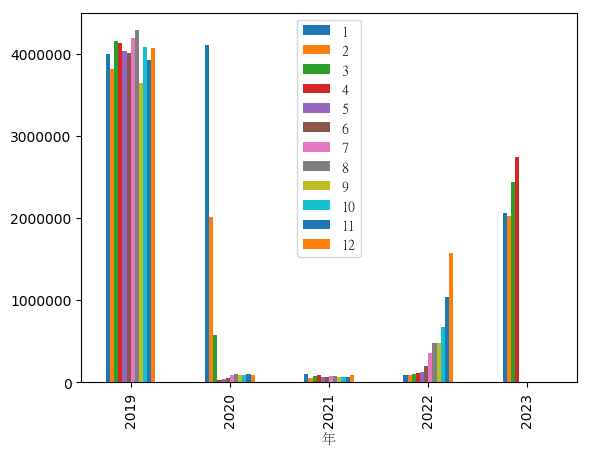

In [5]:
df_pivot.plot(kind='bar')
plt.legend(prop = font)
plt.xlabel('年', fontproperties = font)
plt.show()

## 寬式資料轉為長式資料

### melt方法叫做資料融合，是dataFrame擁有的方法
#### DataFrame.melt(id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None, ignore_index=True)

>- id_vars：[tuple, list, ndarray]，列中識別符變數，不參與融合。
- value_vars：[tuple, list, ndarray]，列中融合變數，預設全部融合。
- var_name：[scalar]，融合後變數名字，預設variable。
- value_name：[scalar]，融合後值名字，預設value。
- col_level：[int, str]，多重列索引時選擇列。
- ignore_index：[bool]，融合後索引是否重新排序，預設True。

In [6]:
df_long = df_pivot.reset_index().melt(id_vars='年', var_name='月', value_name='總計')
df_long

,年,月,總計
0,2019,1,4001016.0
1,2020,1,4107181.0
2,2021,1,96365.0
3,2022,1,92128.0
4,2023,1,2063975.0
5,2019,2,3820665.0
6,2020,2,2009524.0
7,2021,2,58067.0
8,2022,2,95251.0
9,2023,2,2024072.0


### seaborn

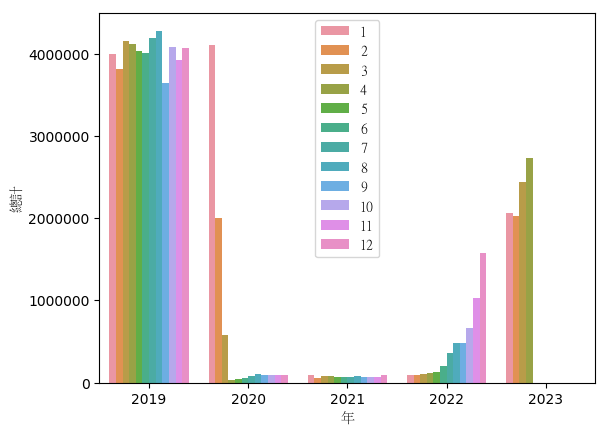

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
font = fm.FontProperties(fname = r'C:\Windows\Fonts\mingliu.ttc')
sns.barplot(data = df_long, x='年', y='總計', hue='月')
plt.legend(prop = font)
plt.xlabel('年', fontproperties = font)
plt.ylabel('總計', fontproperties = font)
plt.show()

### pd.wide_to_long
#### pd.wide_to_long函數是pandas自帶的，是對melt的一種補充，在特殊的寬轉長情況下更適用。
#### pandas.wide_to_long(df, stubnames, i, j, sep='', suffix='\d+')

>- df:[pd.dataframe]，寬型數據框
- stubnames:[str,list-like]，列名中的存根名字
- i:[str,list-like]，列中的索引變數
- j:[str]，尾碼的重命名
- sep:[str,default ""]，存根名與尾碼之間的分隔符號
- suffix:[str,default "\d+"]，尾碼


In [17]:
df = pd.DataFrame({"A1970" : [1,33,3],
                   "B1980" : [3,5,7],
                   "A1980" : [13,15,17],
                   "B1970" : [6,8,14],
                   "x"     : [1,2,3],
                   "y"     : [4,5,6]})
df

,A1970,B1980,A1980,B1970,x,y
0,1,3,13,6,1,4
1,33,5,15,8,2,5
2,3,7,17,14,3,6


In [19]:
pd.wide_to_long(df,stubnames=['A','B'],j='year',i='x')

y   A   B
x year           
1 1970  4   1   6
  1980  4  13   3
2 1970  5  33   8
  1980  5  15   5
3 1970  6   3  14
  1980  6  17   7

- 設定stubnames，函數會根據設置的字元去資料列中匹配目標列，然後轉換為長資料

In [20]:
pd.wide_to_long(df,stubnames=['A',],j='year',i='x')

,,y,B1970,B1980,A
x,year,,,,
1,1970,4,6,3,1
2,1970,5,8,5,33
3,1970,6,14,7,3
1,1980,4,6,3,13
2,1980,5,8,5,15
3,1980,6,14,7,17


- 參數i可以設置為多列，回傳多個索引。

In [22]:
pd.wide_to_long(df,stubnames=['A','B'],j='year',i=['x','y'])

A   B
x y year        
1 4 1970   1   6
    1980  13   3
2 5 1970  33   8
    1980  15   5
3 6 1970   3  14
    1980  17   7

# 範例2
資料來源：交通部氣象局
- https://www.cwb.gov.tw/V8/C/C/Statistics/monthlymean.html

In [8]:
import requests
import pandas as pd
url = 'https://www.cwb.gov.tw/V8/C/C/Statistics/MonthlyMean/MOD/Taiwan_precp.html?ID=721'
res = requests.get(url)
#namelist = ['地區', '一月','二月','三月','四月','五月','六月','七月','八月','九月','十月','十一月','十二月','合計','統計期間']
namelist = ['地區', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,'合計','統計期間']
df = pd.read_html('<table>' + res.text + '</table>')[0]
df.columns = namelist
df = df.iloc[:5, :-2]
df

,地區,1,2,3,4,5,6,7,8,9,10,11,12
0,淡水,105.9,148.0,153.4,157.6,239.8,257.4,119.8,218.3,290.1,165.8,104.2,112.4
1,鞍部,296.7,291.3,246.7,222.3,334.0,341.1,230.9,400.8,724.6,683.6,502.5,422.6
2,臺北,93.8,129.4,157.8,151.4,245.2,354.6,214.2,336.5,336.8,162.6,89.3,96.9
3,竹子湖,220.0,233.1,193.1,176.5,279.0,310.6,215.7,414.4,662.8,649.7,430.6,358.2
4,基隆,327.8,349.8,274.4,211.0,284.1,290.4,119.5,211.4,390.1,377.6,396.9,356.6


### pandas

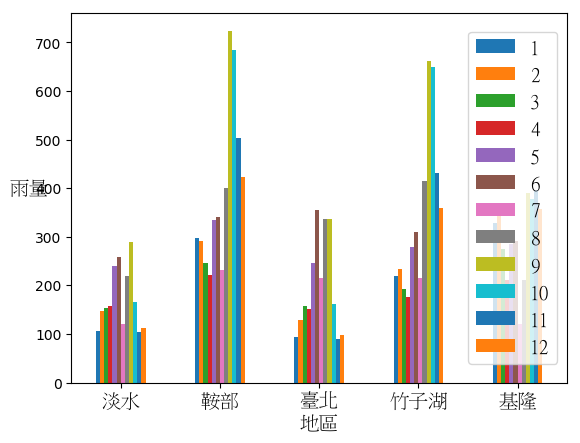

In [10]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font = fm.FontProperties(fname = r'C:\Windows\Fonts\mingliu.ttc', size = 14)
df.iloc[:5].set_index('地區').plot(kind = 'bar')
plt.legend(loc = 5, prop = font)
plt.xticks(fontproperties = font, rotation = 0)
plt.xlabel('地區', fontproperties = font)
plt.ylabel('雨量', fontproperties = font, rotation = 0)
plt.show()

## 寬式資料轉為長式資料

In [15]:
df_long = (df
.iloc[:5]
.melt(id_vars='地區', value_vars = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
.rename(columns = {'value':'雨量'}))
df_long

,地區,variable,雨量
0,淡水,1,105.9
1,鞍部,1,296.7
2,臺北,1,93.8
3,竹子湖,1,220.0
4,基隆,1,327.8
5,淡水,2,148.0
6,鞍部,2,291.3
7,臺北,2,129.4
8,竹子湖,2,233.1
9,基隆,2,349.8


### seaborn

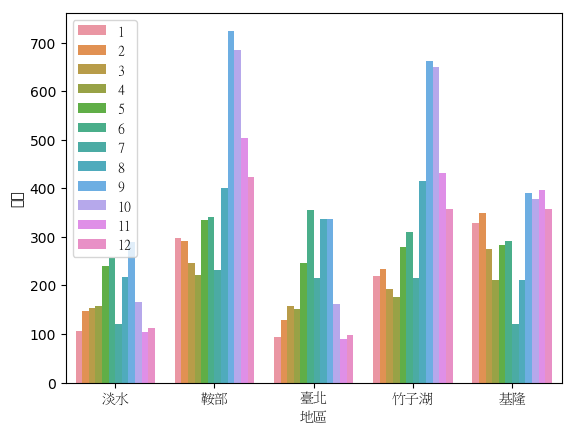

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
font = fm.FontProperties(fname = r'C:\Windows\Fonts\mingliu.ttc')
sns.barplot(data = df_long, x='地區', y='雨量', hue='月份')
plt.legend(prop = font)
plt.xlabel('地區', fontproperties = font)
plt.xticks( fontproperties = font)
plt.show()

In [70]:
df_pivot = df_long.pivot_table(values='雨量', index='地區', columns='月份', aggfunc='sum')
df_pivot

月份,1,2,3,4,5,6,7,8,9,10,11,12
地區,,,,,,,,,,,,
基隆,327.8,349.8,274.4,211.0,284.1,290.4,119.5,211.4,390.1,377.6,396.9,356.6
淡水,105.9,148.0,153.4,157.6,239.8,257.4,119.8,218.3,290.1,165.8,104.2,112.4
竹子湖,220.0,233.1,193.1,176.5,279.0,310.6,215.7,414.4,662.8,649.7,430.6,358.2
臺北,93.8,129.4,157.8,151.4,245.2,354.6,214.2,336.5,336.8,162.6,89.3,96.9
鞍部,296.7,291.3,246.7,222.3,334.0,341.1,230.9,400.8,724.6,683.6,502.5,422.6


### pandas

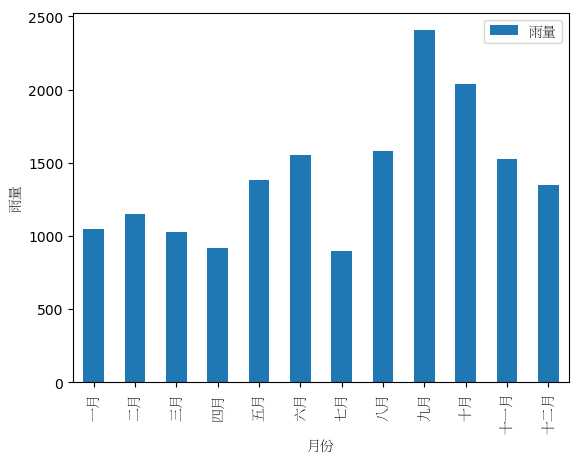

In [44]:
(df
.iloc[:5, :-2]
.melt(id_vars='地區')
.rename(columns = {'variable': '月份', 'value':'雨量'})
.groupby('月份', sort = False)
.sum()
.plot(kind = 'bar'))
plt.legend(loc = 1, prop = font)
plt.xticks(fontproperties = font)
plt.xlabel('月份', fontproperties = font, rotation = 0)
plt.ylabel('雨量', fontproperties = font)
plt.show()

# 範例3

## 寬式資料
### pandas

In [1]:
import numpy as np
import pandas as pd

df = pd.DataFrame({
    'Name': ['Emily', 'Wilson', 'John', 'Cherry'],
    '2020': np.random.randint(100, size = 4),
    '2021': np.random.randint(100, size = 4),
    '2022': np.random.randint(100, size = 4),
})
df.set_index('Name')

,2020,2021,2022
Name,,,
Emily,99,43,80
Wilson,78,67,97
John,16,33,50
Cherry,49,32,89


In [72]:
df.iloc[:, :2].set_index('Name').plot(kind = 'bar', figsize = (5,3))

In [73]:
df.set_index('Name').plot(kind = 'bar')

## 寬式資料轉為長式資料
### seaborn

In [74]:
df_long = df.melt(id_vars='Name').set_index('Name').rename(columns = {'variable': 'Year', 'value':'Data'})
df_long

,Year,Data
Name,,
Emily,2020,29
Wilson,2020,95
John,2020,51
Cherry,2020,26
Emily,2021,80
Wilson,2021,92
John,2021,72
Cherry,2021,81
Emily,2022,75


In [10]:
df_long = df.set_index('Name').stack().reset_index().rename(columns = {'Name':'名子', 'level_1':'年', 0:'值'})
df_long

,名子,年,值
0,Emily,2020,8
1,Emily,2021,43
2,Emily,2022,11
3,Wilson,2020,39
4,Wilson,2021,46
5,Wilson,2022,68
6,John,2020,93
7,John,2021,41
8,John,2022,79
9,Cherry,2020,93


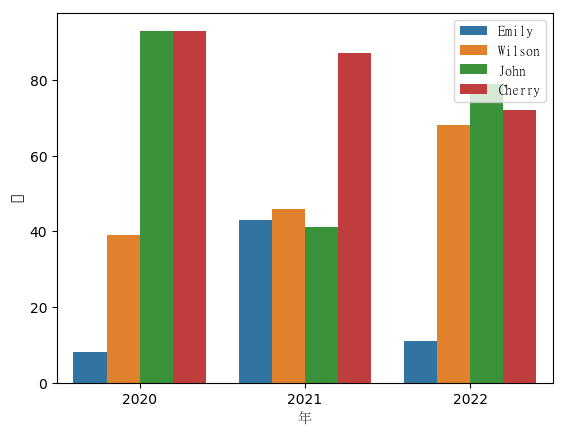

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
font = fm.FontProperties(fname = r'C:\Windows\Fonts\mingliu.ttc')
sns.barplot(data = df_long, x='年', y='值', hue='名子')
plt.legend(prop = font)
plt.xlabel('年', fontproperties = font)
plt.show()

## 長式資料轉為寬式資料

In [77]:
df_pivot = df_long.pivot_table(values='Data', index='Name', columns='Year', aggfunc='sum')
df_pivot

Year,2020,2021,2022
Name,,,
Cherry,26,81,92
Emily,29,80,75
John,51,72,49
Wilson,95,92,25


[參考資料](https://towardsdatascience.com/reshaping-a-dataframe-with-pandas-stack-and-unstack-925dc9ce1289)

# 範例4

### 寬資料轉長資料

In [23]:
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two','two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'cat':['alpha','alpha','alpha','beta','beta','beta'],
                   'baz': [1, 2, 3, 4, 5, 6],
                   'zoo': [4, 6, 8, 1, 2, 9]})
df

,foo,bar,cat,baz,zoo
0,one,A,alpha,1,4
1,one,B,alpha,2,6
2,one,C,alpha,3,8
3,two,A,beta,4,1
4,two,B,beta,5,2
5,two,C,beta,6,9


In [24]:
df.pivot(index='foo',columns='bar',values='baz')

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [25]:
df.pivot(index=['foo','bar'],columns='cat',values='baz')

cat      alpha  beta
foo bar             
one A      1.0   NaN
    B      2.0   NaN
    C      3.0   NaN
two A      NaN   4.0
    B      NaN   5.0
    C      NaN   6.0

In [26]:
df.pivot(index='foo',columns=['bar','cat'],values='baz')

bar,A,B,C,A,B,C
cat,alpha,alpha,alpha,beta,beta,beta
foo,,,,,,
one,1.0,2.0,3.0,NaN,NaN,NaN
two,NaN,NaN,NaN,4.0,5.0,6.0


In [27]:
df.pivot(index='foo',columns='bar',values=['baz','zoo'])

baz       zoo      
bar   A  B  C   A  B  C
foo                    
one   1  2  3   4  6  8
two   4  5  6   1  2  9